# ZIPPING (make notes in onenote)

In [2]:
list1 = [0, 1, 2, 3]
list2 = [4, 5, 6, 7]

zipped_lists = zip(list1, list2)
list(zipped_lists)

# zip function takes two lists, and zips them. the same index will be assigned into a tuple. it will then create a list of these tuples.

[(0, 4), (1, 5), (2, 6), (3, 7)]

## Rotation

In [3]:
# Importing
import os
import glob
import sys
sys.path.append(os.path.join(".."))

import cv2
import numpy as np 

# display utils
from utils.imutils import jimshow 
import matplotlib.pyplot as plt
import matplotlib as mpl

## Load image

In [4]:
image = cv2.imread(os.path.join("..", "data", "Pokemon_Images", "red_and_blue.png"))

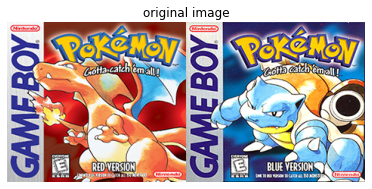

In [5]:
jimshow(image, "original image")

### Only blue channel histogram


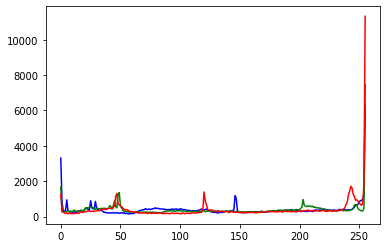

In [6]:
## Blue
hist_blue = cv2.calcHist([image], [0], None, [256], [0,256])
plt.plot(hist_blue, color="blue")

# Green
hist_green = cv2.calcHist([image], [1], None, [256], [0,256])
plt.plot(hist_green, color="green")

# Red
hist_red = cv2.calcHist([image], [2], None, [256], [0,256])
plt.plot(hist_red, color="red")

In [7]:
Blue, Green, Red = cv2.split(image)

In [8]:
hist = cv2.calcHist([Blue], [0],  None, [256], [0,256])

### Plot multiple channels at the same time

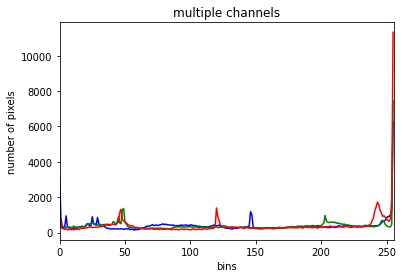

In [9]:
# split channels
channels = cv2.split(image)

# name of colors
color_names = ["b", "g", "r"]

# create figure
plt.figure() 

# add title
plt.title("multiple channels")

# add labels
plt.xlabel("bins")
plt.ylabel("number of pixels")

# loop over our channels
for channel, color_name in zip(channels, color_names):
    # create histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])

    # plot histogram
    plt.plot(hist, color = color_name)

    # set limits of x-axis
    plt.xlim([0, 256])


# show the plot
plt.show()

### Comparing histograms

In [10]:
image2 = cv2.imread(os.path.join("..", "data", "Pokemon_Images", "059-Arcanine.jpg"))

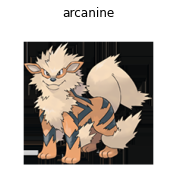

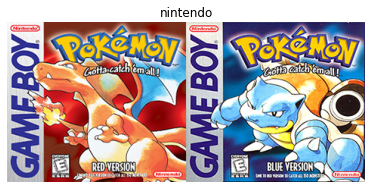

In [11]:
jimshow(image2, "arcanine")
jimshow(image, "nintendo")

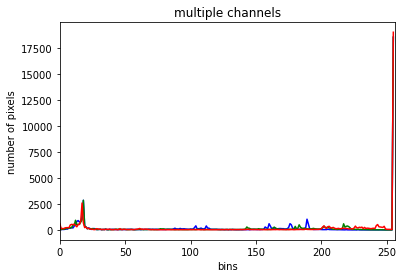

In [12]:
# split channels
channels = cv2.split(image2)

# name of colors
color_names = ["b", "g", "r"]

# create figure
plt.figure() 

# add title
plt.title("multiple channels")

# add labels
plt.xlabel("bins")
plt.ylabel("number of pixels")

# loop over our channels
for channel, color_name in zip(channels, color_names):
    # create histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])

    # plot histogram
    plt.plot(hist, color = color_name)

    # set limits of x-axis
    plt.xlim([0, 256])


# show the plot
plt.show()

In [13]:
hist1 = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

In [14]:
hist2 = cv2.calcHist([image2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

To compare histograms, you need to do a min max 
# min-max normalization
- (value-min)/(max-min)


In [15]:
hist1 = cv2.normalize(hist1, hist1, 0,255, cv2.NORM_MINMAX)
hist2 = cv2.normalize(hist2, hist2, 0,255, cv2.NORM_MINMAX)

In [16]:
cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR) # think of the chisqdist, as relative. the higher the number the larger the distance.

2946.2836030850913

In [17]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

2946.28


- "fundamentally, what we're doing"
- "nao"
- "cv2 allows us to do this faiiirly simply but normalizing"
- "so essentially what we're doing is"
